#### Implementation of stochastic gradient descent optimization algo

In [11]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import preprocessing
#%matplotlib.inline
df = pd.read_csv('train.csv')
df = df.dropna()
sx= preprocessing.MinMaxScaler()
sy= preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(df.drop('SalePrice',axis='columns'))
scaled_y = sy.fit_transform(df['SalePrice'].values.reshape(df.shape[0],1))

In [17]:

#mini batch gradient descent
def batch_gradent_descent(X,y_true, epochs, learning_rate = 0.01):
    number_of_features= X.shape[1] 
    w= np.ones(shape= number_of_features) # array of weights
    b= 0 # bias
    total_samples= X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range (epochs):
        y_predicted = np.dot(w, X.T) + b # Y= ax+b
        w_grad = -(2.0/total_samples)*(X.T.dot(y_true-y_predicted)) # cost function for weight
        b_grad = -(2.0/total_samples)*np.sum(y_true-y_predicted) # cost function for weight
        w = w - learning_rate * w_grad  # new weight
        b = b - learning_rate * b_grad  # new bias
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batch_gradent_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),100)


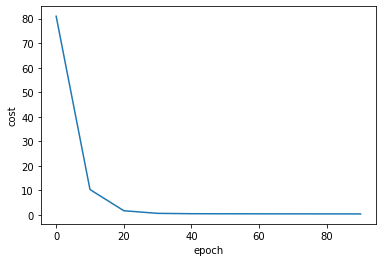

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [86]:
scaled_x

array([[0.00000000e+00, 2.35294118e-01, 1.50684932e-01, ...,
        0.00000000e+00, 9.09090909e-02, 5.00000000e-01],
       [6.85400960e-04, 0.00000000e+00, 2.02054795e-01, ...,
        0.00000000e+00, 3.63636364e-01, 2.50000000e-01],
       [1.37080192e-03, 2.35294118e-01, 1.60958904e-01, ...,
        0.00000000e+00, 7.27272727e-01, 5.00000000e-01],
       ...,
       [9.98629198e-01, 2.94117647e-01, 1.54109589e-01, ...,
        1.00000000e+00, 3.63636364e-01, 1.00000000e+00],
       [9.99314599e-01, 0.00000000e+00, 1.60958904e-01, ...,
        0.00000000e+00, 2.72727273e-01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.84931507e-01, ...,
        0.00000000e+00, 4.54545455e-01, 5.00000000e-01]])

In [87]:
df['SalePrice'].values.reshape(df.shape[0],1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [89]:
scaled_y

array([[0.24064422],
       [0.20312802],
       [0.26148656],
       ...,
       [0.32123459],
       [0.14841689],
       [0.15588539]])

In [46]:
w= np.ones(scaled_x.shape[1])

In [47]:
np.dot(w, scaled_x.T)

array([ 9.89672695,  8.76656011, 10.78936178, ..., 11.51254815,
        9.07153939,  9.39306286])

In [73]:
scaled_y.reshape(scaled_y.shape[0])

ValueError: cannot reshape array of size 1460 into shape (1460,0)

(array([ 0.1752911 ,  0.49046003,  0.62624901,  0.89051971, -0.07132489,
         0.26369327, -0.12756677, -0.06740377,  0.71373217,  0.77656112,
         0.88912268,  0.58975392,  0.61000703,  0.57746689,  0.35731645,
         0.9424574 ,  0.39325293,  0.41276957,  0.89566633, -0.03818075,
         0.34157348,  0.10039345,  0.88845855, -0.01220671,  0.28545865,
        -0.15829547,  0.20162342,  0.3296251 ,  0.66766318,  0.70488992,
         0.89563731,  0.97441657,  0.81966181,  0.92255938,  0.94613072,
         0.19805873,  0.21448117]),
 -1.489768162187707,
 0.25751810236017897)

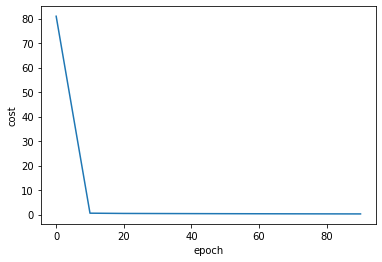

In [109]:
# def predict(area,bedrooms,w,b):
#     scaled_X = sx.transform([[area, bedrooms]])[0]
#     # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
#     # equation for price is w1*area + w2*bedrooms + w3*age + bias
#     # scaled_X[0] is area
#     # scaled_X[1] is bedrooms
#     # scaled_X[2] is age
#     scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
#     # once we get price prediction we need to to rescal it back to original value
#     # also since it returns 2D array, to get single value we need to do value[0][0]
#     return sy.inverse_transform([[scaled_price]])[0][0]

# predict(2600,4,w,b)

### Stochastic Gradient Descent Implementation
###### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [102]:
# we will use random libary to pick random training sample.

random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [22]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.square(sample_y-y_predicted)
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,
                                                                                    scaled_y.reshape(scaled_y.shape[0],),
                                                                                    10000)
w_sgd, b_sgd, cost_sgd

(array([0.47517422, 0.7713315 , 0.82036818, 0.95487465, 0.42705274,
        0.47944949, 0.23704767, 0.33792959, 0.91576697, 0.91384087,
        0.96755064, 0.73161931, 0.80997549, 0.81144416, 0.79925234,
        0.99051843, 0.76516451, 0.77075551, 0.96939984, 0.42651628,
        0.77777446, 0.49830439, 0.97793317, 0.56242635, 0.76924254,
        0.23271085, 0.6620475 , 0.6941649 , 0.87282491, 0.90229805,
        0.96403042, 0.99207503, 0.95984125, 0.99363191, 0.98739057,
        0.48747199, 0.52664432]),
 -1.0299171655729837,
 10.355525550288455)

In [111]:
# weights & bias
w , b 

(array([ 0.1752911 ,  0.49046003,  0.62624901,  0.89051971, -0.07132489,
         0.26369327, -0.12756677, -0.06740377,  0.71373217,  0.77656112,
         0.88912268,  0.58975392,  0.61000703,  0.57746689,  0.35731645,
         0.9424574 ,  0.39325293,  0.41276957,  0.89566633, -0.03818075,
         0.34157348,  0.10039345,  0.88845855, -0.01220671,  0.28545865,
        -0.15829547,  0.20162342,  0.3296251 ,  0.66766318,  0.70488992,
         0.89563731,  0.97441657,  0.81966181,  0.92255938,  0.94613072,
         0.19805873,  0.21448117]),
 -1.489768162187707)

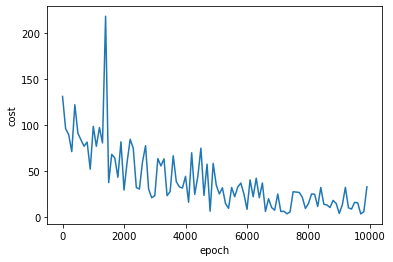

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

## Implementation of mini batch grandient descent 

In [113]:
np.random.permutation(20)

array([18,  3, 19, 15, 13,  5,  1,  9,  6, 14,  2,  0, 16, 10, 17, 12,  4,
        7, 11,  8])

In [31]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples   
    cost_list = []
    epoch_list = [] 
    num_batches = int(total_samples/batch_size)
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad   
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [27]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),epochs = 120,batch_size = 10)

In [119]:
w, b, cost

(array([ 0.01198281, -0.02461595,  0.05103961,  0.63642375,  0.15427847,
         0.2115537 ,  0.22377173, -0.01929097,  0.11496403,  0.52002593,
         0.1292093 ,  0.18684206,  0.03567004,  0.09650994,  0.20828055,
         0.32383837, -0.12703917, -0.0065185 , -0.01380384,  0.0021595 ,
        -0.00364298, -0.00702085,  0.17838078, -0.05249089,  0.02029921,
         0.02038807,  0.07102068, -0.06156213,  0.05250612,  0.00814329,
         0.18160167,  0.41512489,  0.04695681,  0.12560205,  0.21872007,
         0.01891949,  0.00310083]),
 -0.3348019099287081,
 3.6352591022220083e-05)

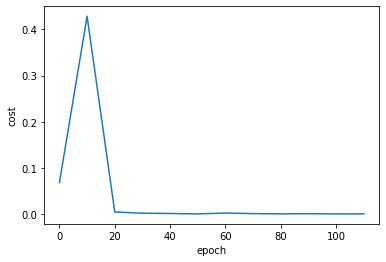

In [32]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)